In [1]:
#Importing Python Modules Pandas, Numpy, Seaborn and MetaplotLib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading HCV dataset into variable df by using pandas
df = pd.read_csv("F:\Data Science Course\Joyita\Heart Failure - CBV\heart_failure_clinical_records.csv")

In [3]:
#To view first 5 rows of the dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
df.drop(["anaemia", "creatinine_phosphokinase"], axis=1, inplace=True)
df.head()

,age,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
# Import Library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    #Calculating VIF
    vif=pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [8]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,age,28.845213
1,diabetes,1.788433
2,ejection_fraction,12.065505
3,high_blood_pressure,1.638430
4,platelets,8.615141
5,serum_creatinine,2.918107
6,serum_sodium,56.093821
7,sex,3.758288
8,smoking,1.876257
9,time,4.258945


In [9]:
#spliting independent features and target label
X = df.iloc[:,:-1]  #independent features
Y = df["DEATH_EVENT"]  #dependent feature or target 

In [10]:
X.head()

,age,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,20,0,327000.00,2.7,116,0,0,8


In [11]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [12]:
#SKLearn for train and test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#train ==> i will teach my model, frame mathematical equation
#test

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state = 0)

In [14]:
X_train

,age,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
134,81.0,0,35,0,231000.0,1.18,137,1,1,107
145,50.0,0,30,0,266000.0,0.70,141,1,1,112
63,45.0,0,35,0,385000.0,1.00,145,1,0,61
292,52.0,1,38,0,382000.0,1.00,140,1,1,258
284,50.0,0,40,0,279000.0,0.80,141,1,0,250
...,...,...,...,...,...,...,...,...,...,...
251,55.0,1,35,0,231000.0,0.80,143,0,0,215
192,50.0,1,40,0,260000.0,0.70,130,1,0,175
117,85.0,0,60,0,507000.0,3.20,138,0,0,94
47,60.0,1,38,1,451000.0,0.60,138,1,1,40


In [15]:
Y_train

134    0
145    0
63     1
292    0
284    0
      ..
251    0
192    0
117    0
47     1
172    0
Name: DEATH_EVENT, Length: 239, dtype: int64

In [16]:
#from sklearn.preprocessing import StandardScaler

#std_scalar = StandardScaler()
#std_scalar.fit_transform(X_train) 
#std_scalar.transform(X_test) 

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_scalar = MinMaxScaler()
min_scalar.fit_transform(X_train) 
min_scalar.transform(X_test) 

array([[0.        , 0.        , 0.54166667, 0.        , 0.24354467,
        0.03370787, 0.8       , 0.        , 0.        , 0.66304348],
       [0.38272222, 1.        , 0.54166667, 1.        , 0.21323797,
        0.05617978, 0.65714286, 0.        , 0.        , 0.60869565],
       [0.09259259, 0.        , 0.33333333, 0.        , 0.13444054,
        0.06741573, 0.68571429, 1.        , 0.        , 0.02536232],
       [0.27777778, 1.        , 0.4375    , 1.        , 0.41932355,
        0.02247191, 0.77142857, 0.        , 0.        , 0.69927536],
       [0.55555556, 0.        , 0.33333333, 0.        , 0.17929446,
        0.07865169, 0.54285714, 1.        , 0.        , 0.74637681],
       [0.46296296, 1.        , 0.95833333, 0.        , 0.17808219,
        0.04494382, 0.68571429, 0.        , 0.        , 0.37318841],
       [0.46296296, 0.        , 0.22916667, 0.        , 0.25687962,
        0.50561798, 0.48571429, 0.        , 0.        , 0.73550725],
       [0.18518519, 1.        , 0.6458333

Logistic Regression Algorithm

In [18]:
#Model Development and Prediction

#sklearn model to load Logistic regression package
from sklearn.linear_model import LogisticRegression
#max_iter=1200000, dual=False , class_weight="balanced", penalty="none"
logreg = LogisticRegression()

#fit training data
logreg.fit(X_train, Y_train)

#predict unseen data on trained model
Y_pred = logreg.predict(X_test)

In [19]:
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

In [22]:
conf_matrix

array([[36,  1],
       [14,  9]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.75

In [24]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

0.9

In [25]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

0.391304347826087

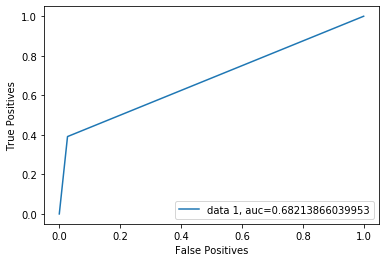

In [26]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  Y_pred)
auc = roc_auc_score(Y_test, Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.legend(loc=4)
plt.show()

Naive Bayes Algorithm

In [27]:
#Model development and prediction

#sklearn model to load Naive bayes package
from sklearn.naive_bayes import GaussianNB #binary
from sklearn.naive_bayes import MultinomialNB  #multiclass
from sklearn.naive_bayes import BernoulliNB

naive =GaussianNB()

#Fit training data 
naive.fit(X_train, Y_train)

#Predict unseen data on trained model
Y_pred = naive.predict(X_test)

In [28]:
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

In [31]:
conf_matrix

array([[36,  1],
       [13, 10]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.7666666666666667

In [33]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

0.9090909090909091

In [34]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

0.43478260869565216

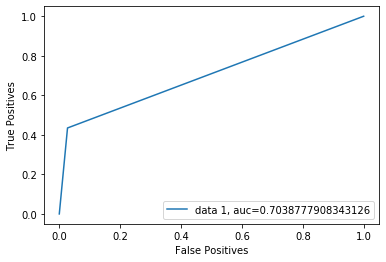

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  Y_pred)
auc = roc_auc_score(Y_test, Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.legend(loc=4)
plt.show()

Decision Tree Algorithm

In [36]:
#sklearn model to load Decision tree package
from sklearn.tree import DecisionTreeClassifier  
#max_iter=1200000, dual=False , class_weight="balanced", penalty="none"
ds_clss = DecisionTreeClassifier()

#Fit training data 
ds_clss.fit(X_train, Y_train)

#Predict unseen data on trained model
Y_pred = ds_clss.predict(X_test)

In [37]:
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

In [40]:
conf_matrix

array([[31,  6],
       [11, 12]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.7166666666666667

In [42]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_pred)
precision

0.6666666666666666

In [43]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, Y_pred)
recall

0.5217391304347826

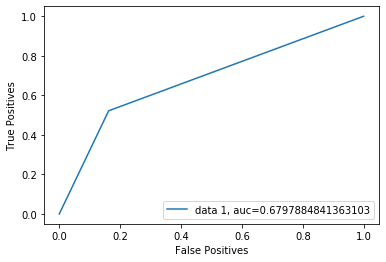

In [44]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test,  Y_pred)
auc = roc_auc_score(Y_test, Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.legend(loc=4)
plt.show()